<a href="https://colab.research.google.com/github/SummerProjectTEAM-10/Diabets-Prediction/blob/main/Final_DIABETES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import drive
drive.mount('/content/pro')

Drive already mounted at /content/pro; to attempt to forcibly remount, call drive.mount("/content/pro", force_remount=True).


In [86]:
#Installation of required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

In [87]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [88]:
#Reading the dataset
df = pd.read_csv("/content/pro/MyDrive/pima-indians-diabetes.csv")

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [91]:
#displaying selected records
df[10:20]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,0,0,0,30.0,0.484,32,1
16,0,118,84,47,230,45.8,0.551,31,1
17,7,107,74,0,0,29.6,0.254,31,1
18,1,103,30,38,83,43.3,0.183,33,0
19,1,115,70,30,96,34.6,0.529,32,1


**EXPLORATORY DATA ANALYSIS**

EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the doctor to identify concern areas and problems, and the resolution of these can boost their accuracy in diagosing diabetes.

In [92]:
df.shape

(768, 9)

In [93]:
#displaying column names
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [94]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
#lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [96]:
# Descriptive statistics of the data set accessed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [97]:
# Count of null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are a total of 768 records and 9 features in the 
dataset.
Each feature can be either of integer or float datatype.
Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
There are zero NaN values in the dataset.
In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

In [98]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [99]:
#The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [100]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [101]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [102]:
# checking for duplicate rows
duplicated_rows = df[df.duplicated()]
duplicated_rows.shape

(0, 9)

Correlation describes the strength and direction of the linear association between two quantitative variables.
It ranges from -1 to +1, Positive value indicate positive association and negative value indicate negative association.

In [103]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


From the correlation matrix we found that

Glucose,
BMI,
Age,
Pregnancies
are the top 4 features that are related to the outcome.

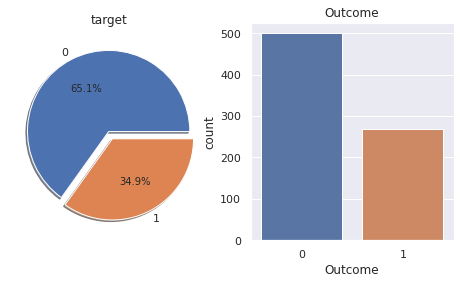

In [104]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(8,4))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [105]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})


,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [106]:
df.groupby("Outcome").agg({"Age":"mean"})


,Age
Outcome,
0,31.190000
1,37.067164


In [107]:
df.groupby("Outcome").agg({"Age":"max"})


,Age
Outcome,
0,81
1,70


In [108]:
df.groupby("Outcome").agg({"Insulin": "mean"})


,Insulin
Outcome,
0,68.792000
1,100.335821


In [109]:
df.groupby("Outcome").agg({"Insulin": "max"})


,Insulin
Outcome,
0,744
1,846


In [110]:
df.groupby("Outcome").agg({"Glucose": "mean"})


,Glucose
Outcome,
0,109.980000
1,141.257463


In [111]:
df.groupby("Outcome").agg({"Glucose": "max"})


,Glucose
Outcome,
0,197
1,199


In [112]:
df.groupby("Outcome").agg({"BMI": "mean"})


,BMI
Outcome,
0,30.304200
1,35.142537


DATA PRE PROCESSING

In [113]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [114]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [115]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

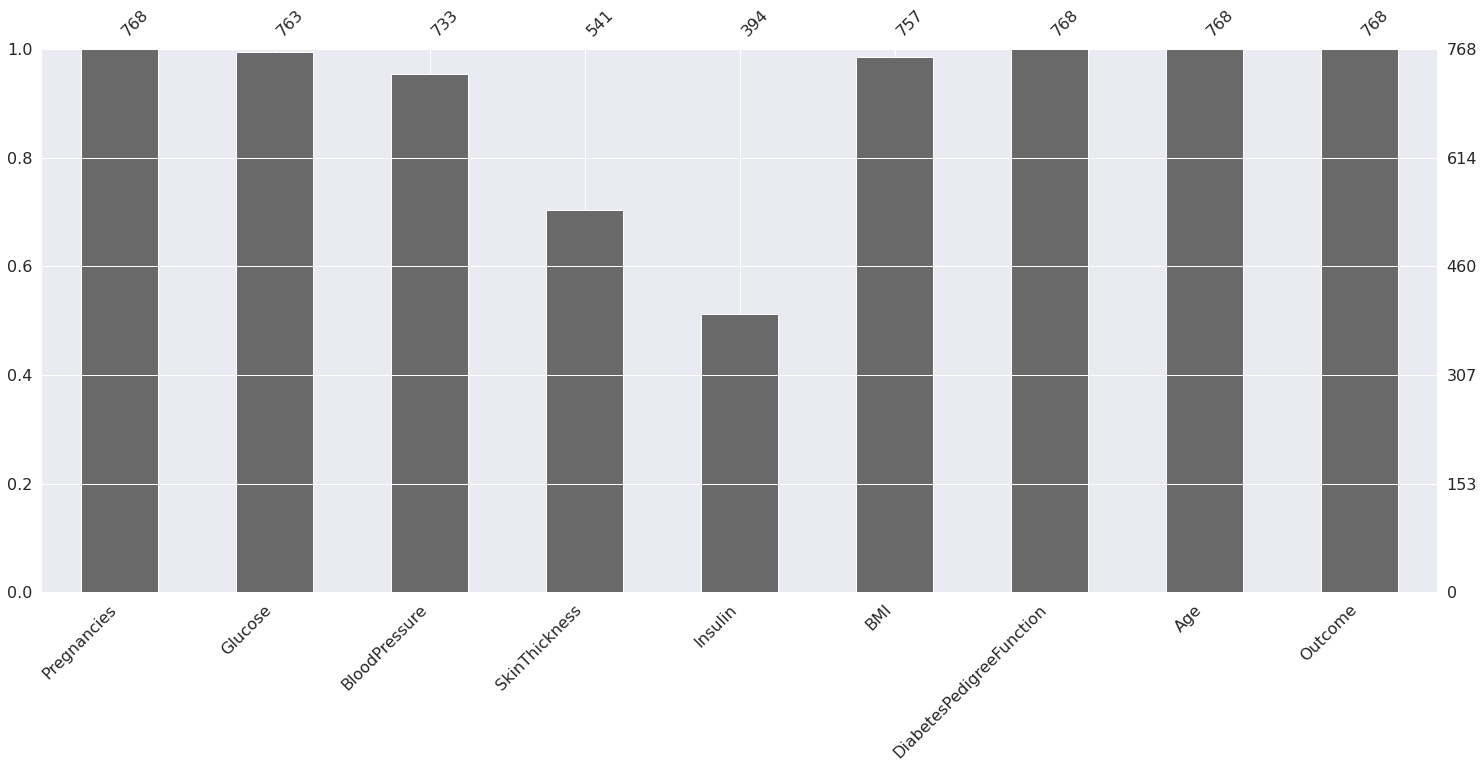

In [116]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(df);

In [117]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [118]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [119]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [120]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

FEATURE SCALING ON THE  DATA

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. 

In [121]:
#Here Features - pregnancies,glucose,bloodpressure,skin thickness,insulin,BMI,diabetes pedigree function,age,outcome  columns are 
#taken using slicing...To handle values with varying magnitude...
from sklearn import preprocessing
x = df.iloc[:, 1:9].values
print ("\nOriginal data values : \n",  x)


Original data values : 
 [[148.     72.     35.    ...   0.627  50.      1.   ]
 [ 85.     66.     29.    ...   0.351  31.      0.   ]
 [183.     64.     32.    ...   0.672  32.      1.   ]
 ...
 [121.     72.     23.    ...   0.245  30.      0.   ]
 [126.     60.     32.    ...   0.349  47.      1.   ]
 [ 93.     70.     31.    ...   0.315  23.      0.   ]]


In [122]:
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

In [123]:
# Scaled feature
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.67096774 0.48979592 0.30434783 ... 0.23441503 0.48333333 1.        ]
 [0.26451613 0.42857143 0.23913043 ... 0.11656704 0.16666667 0.        ]
 [0.89677419 0.40816327 0.27173913 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.49677419 0.48979592 0.17391304 ... 0.07130658 0.15       0.        ]
 [0.52903226 0.36734694 0.27173913 ... 0.11571307 0.43333333 1.        ]
 [0.31612903 0.46938776 0.26086957 ... 0.10119556 0.03333333 0.        ]]


ALGORITHM:
1. Import the necessary package and load the dataset.
2. Plot different graphs- Data Visualization with suitable codes.
3. Pre process the dataset- filling the missing values with median values.
(Feature Engineering)
4. Outlier observation analysis by IQR and Z SCORE method.
5. Add logical new categorical variables to the dataset.
6. Convert categorical variable to numeric variable by Label Encoding and One Hot Encoding.


**Data Visualization: DATA STRUCTURE USED: Pandas DataFrame.**
With the help of data visualization, we can see how the data looks like and what kind of correlation is held by the attributes of data. It is the fastest way to see if the features correspond to the output. Visualization of data is an imperative aspect that helps to understand data and also explain the data to others.

**countplot**
Seaborn library has a function countplot() for creating countplot using sns.countplot() function. One easy way to visualize the counts of observations for outcome type is to create a count plot.

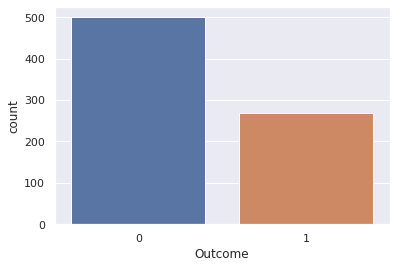

In [124]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = df)

OBSERVATION:
We can observe that the count of 0 outcome that is count of diabetes negative is more than diabetes positive which is denoted as 1.


UNIVARIATE PLOTS: Understanding Attributes Independently.
The simplest type of visualization is single-variable or “univariate” visualization. With the help of univariate visualization, we can understand each attribute of our dataset independently.


**Histogram**:
Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset. Characteristics–
•	It provides us a count of the number of observations in each bin created for visualization.
•	From the shape of the bin, we can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.
•	Histograms also help us to see possible outliers.
hist() function on Pandas DataFrame are used to generate histograms and matplotlib are used for plotting them.


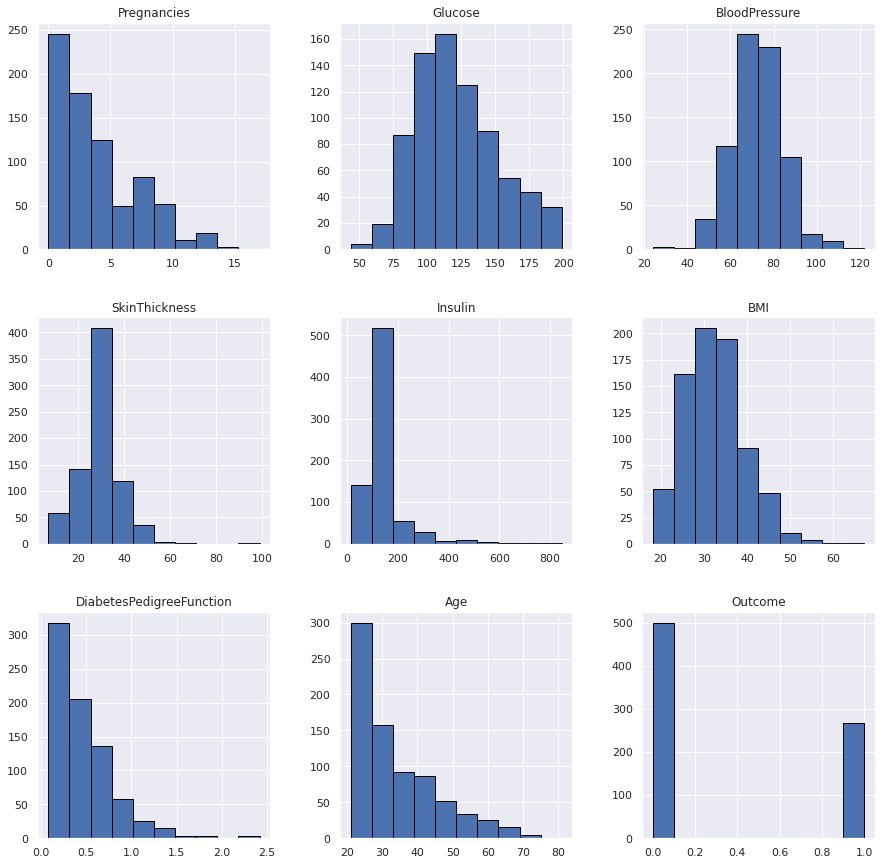

In [125]:
df.hist(bins=10, edgecolor = "black", figsize=(15,15))
plt.show()

OBSERVATION: The output shows that the histogram for each attribute in the dataset is created. From this, we can observe that perhaps Age, Insulin and DiabetesPedigreeFunction attributes may have exponential distribution while BMI and Glucose have Gaussian distribution.

**Density Plots:**
Another quick and easy technique for getting each attributes distribution is Density plots. It is also like histogram but having a smooth curve drawn through the top of each bin. We can call them as abstracted histograms and matplotlib are used for plotting them.

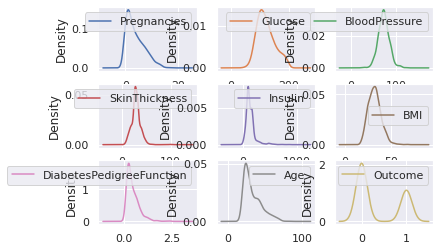

In [126]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

OBSERVATION: The difference between Density plots and Histograms can be easily understood.

**BoxPlot:**
Box and Whisker plots, also called boxplots in short, is another useful technique to review the distribution of each attribute’s distribution Seaborn library is used.

The following are the characteristics of this technique – 
•	It is univariate in nature and summarizes the distribution of each attribute.
•	It draws a line for the middle value i.e. for median.
•	It draws a box around the 25% and 75%.
•	It also draws whiskers which will give us an idea about the spread of the data.
•	The dots outside the whiskers signifies the outlier values. Outlier values would be 1.5 times greater than the size of the spread of the middle data.


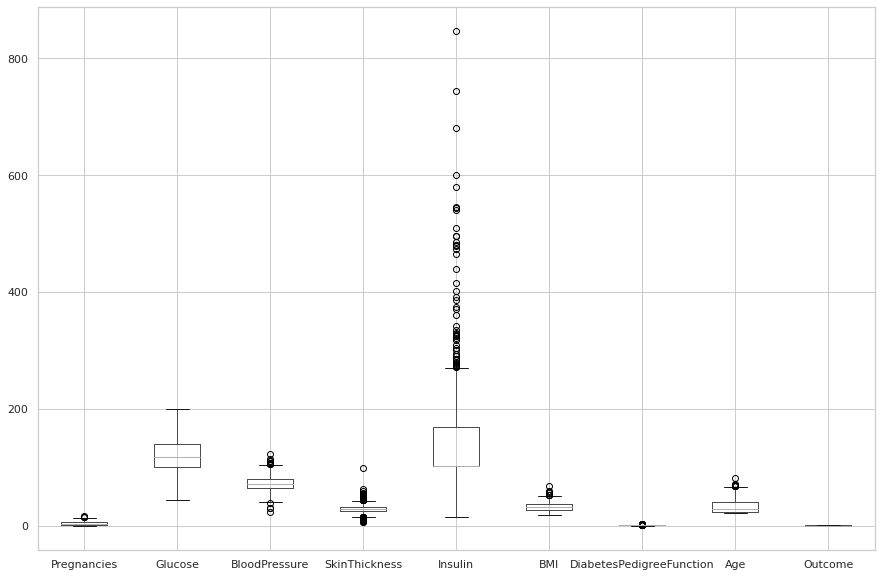

In [127]:
sns.set(style="whitegrid")
df.boxplot(figsize=(15,10))

OBSERVATION: We can observe the outlier values.

MULTIVARIATE PLOTS: Interaction Among Multiple Variables
Another type of visualization is multi-variable or “multivariate” visualization. With the help of multivariate visualization, we can understand interaction between multiple attributes of our dataset.


**Correlation Matrix Plot**

Correlation is an indication about the changes between two variables. We can plot correlation matrix to show which variable is having a high or low correlation in respect to another variable.
Correlation describes the strength and direction of the linear association between two quantitative variables. It ranges from -1 to +1, Positive value indicate positive association and negative value indicate negative association.


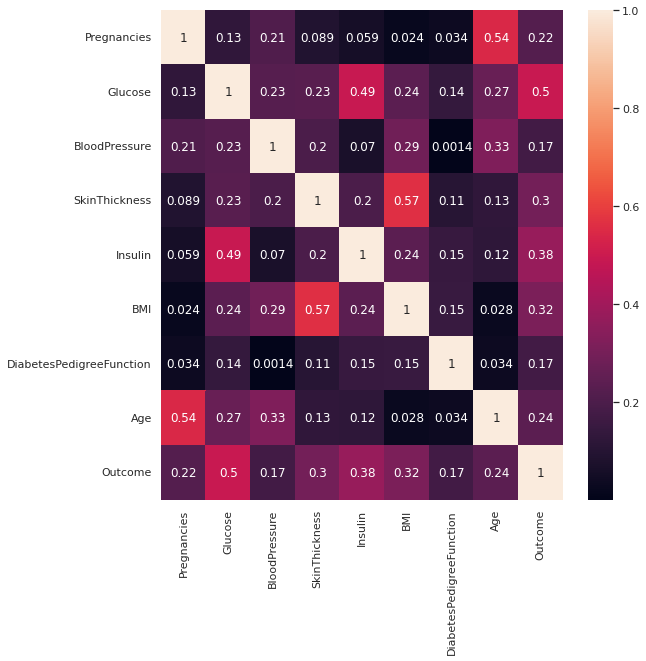

In [128]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(df.corr()), annot=True);

OBSERVATION: Glucose, BMI, Age, Pregnancies are the top 4 features that are related to the outcome. We can also see that it is symmetrical i.e. the bottom left is same as the top right. It is also observed that each variable is positively correlated with each other.

SCATTER MATRIX PLOT: Scatter plots shows how much one variable is affected by another or the relationship between them with the help of dots in two dimensions. Scatter plots are very much like line graphs in the concept that they use horizontal and vertical axes to plot data points. Python script will generate and plot Scatter matrix for the Pima Indian Diabetes dataset. It can be generated with the help of scatter_matrix() function on Pandas DataFrame and plotted with the help of pyplot.

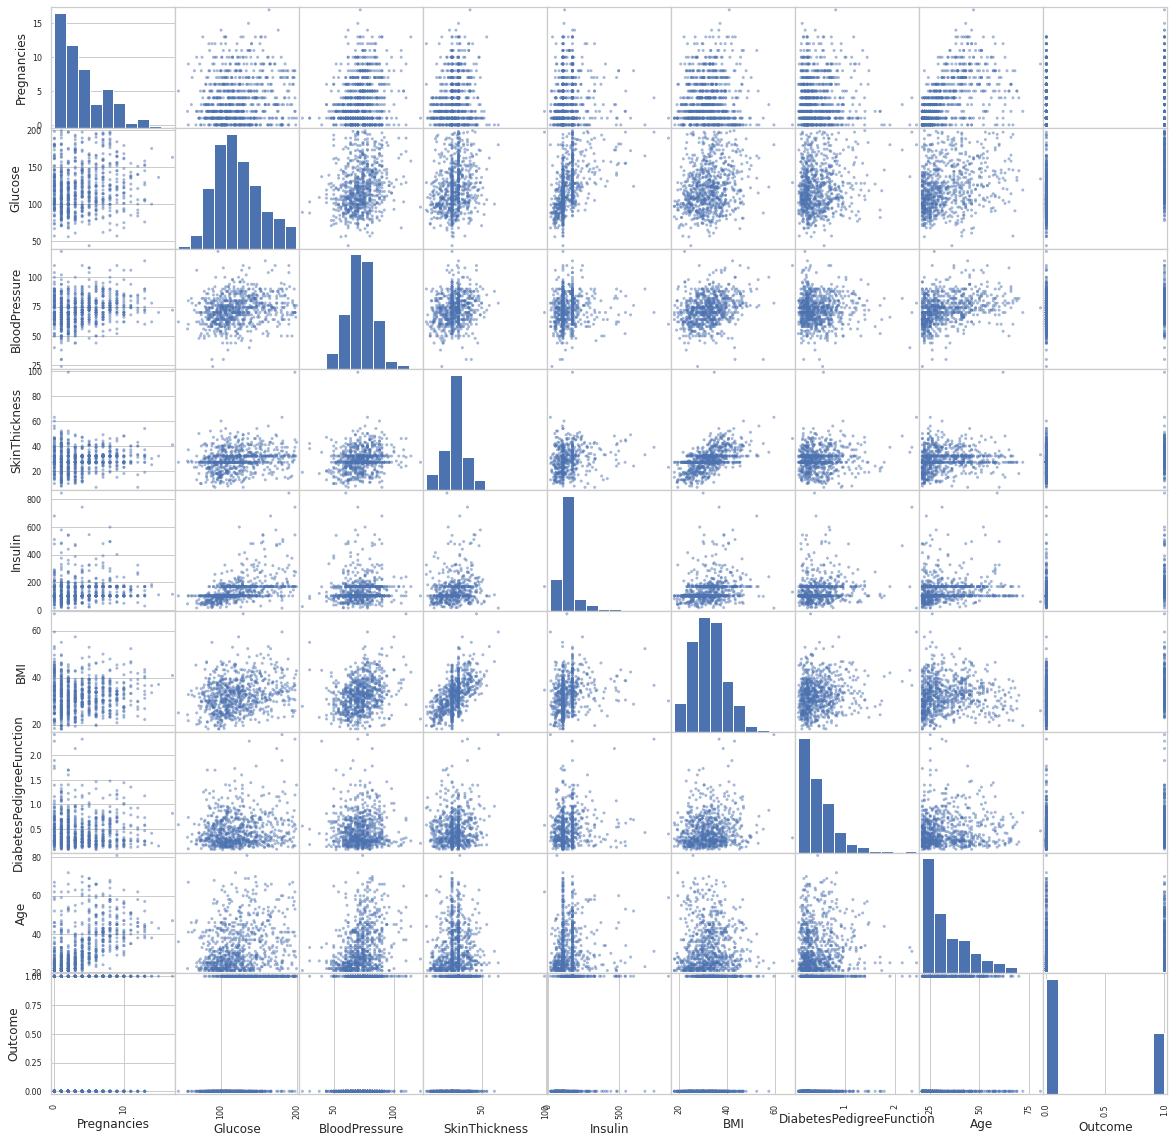

In [129]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize =(20, 20));


OBSERVATION:
We can observe that there is a positive linear relation between the points.


**PairPlot:**
Pairplot visualizes given data to find the relationship between them. Pairplot is a module of seaborn library which provides a high-level interface for drawing attractive and informative statistical graphics. The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.The matplotlib library is used for plotting them.

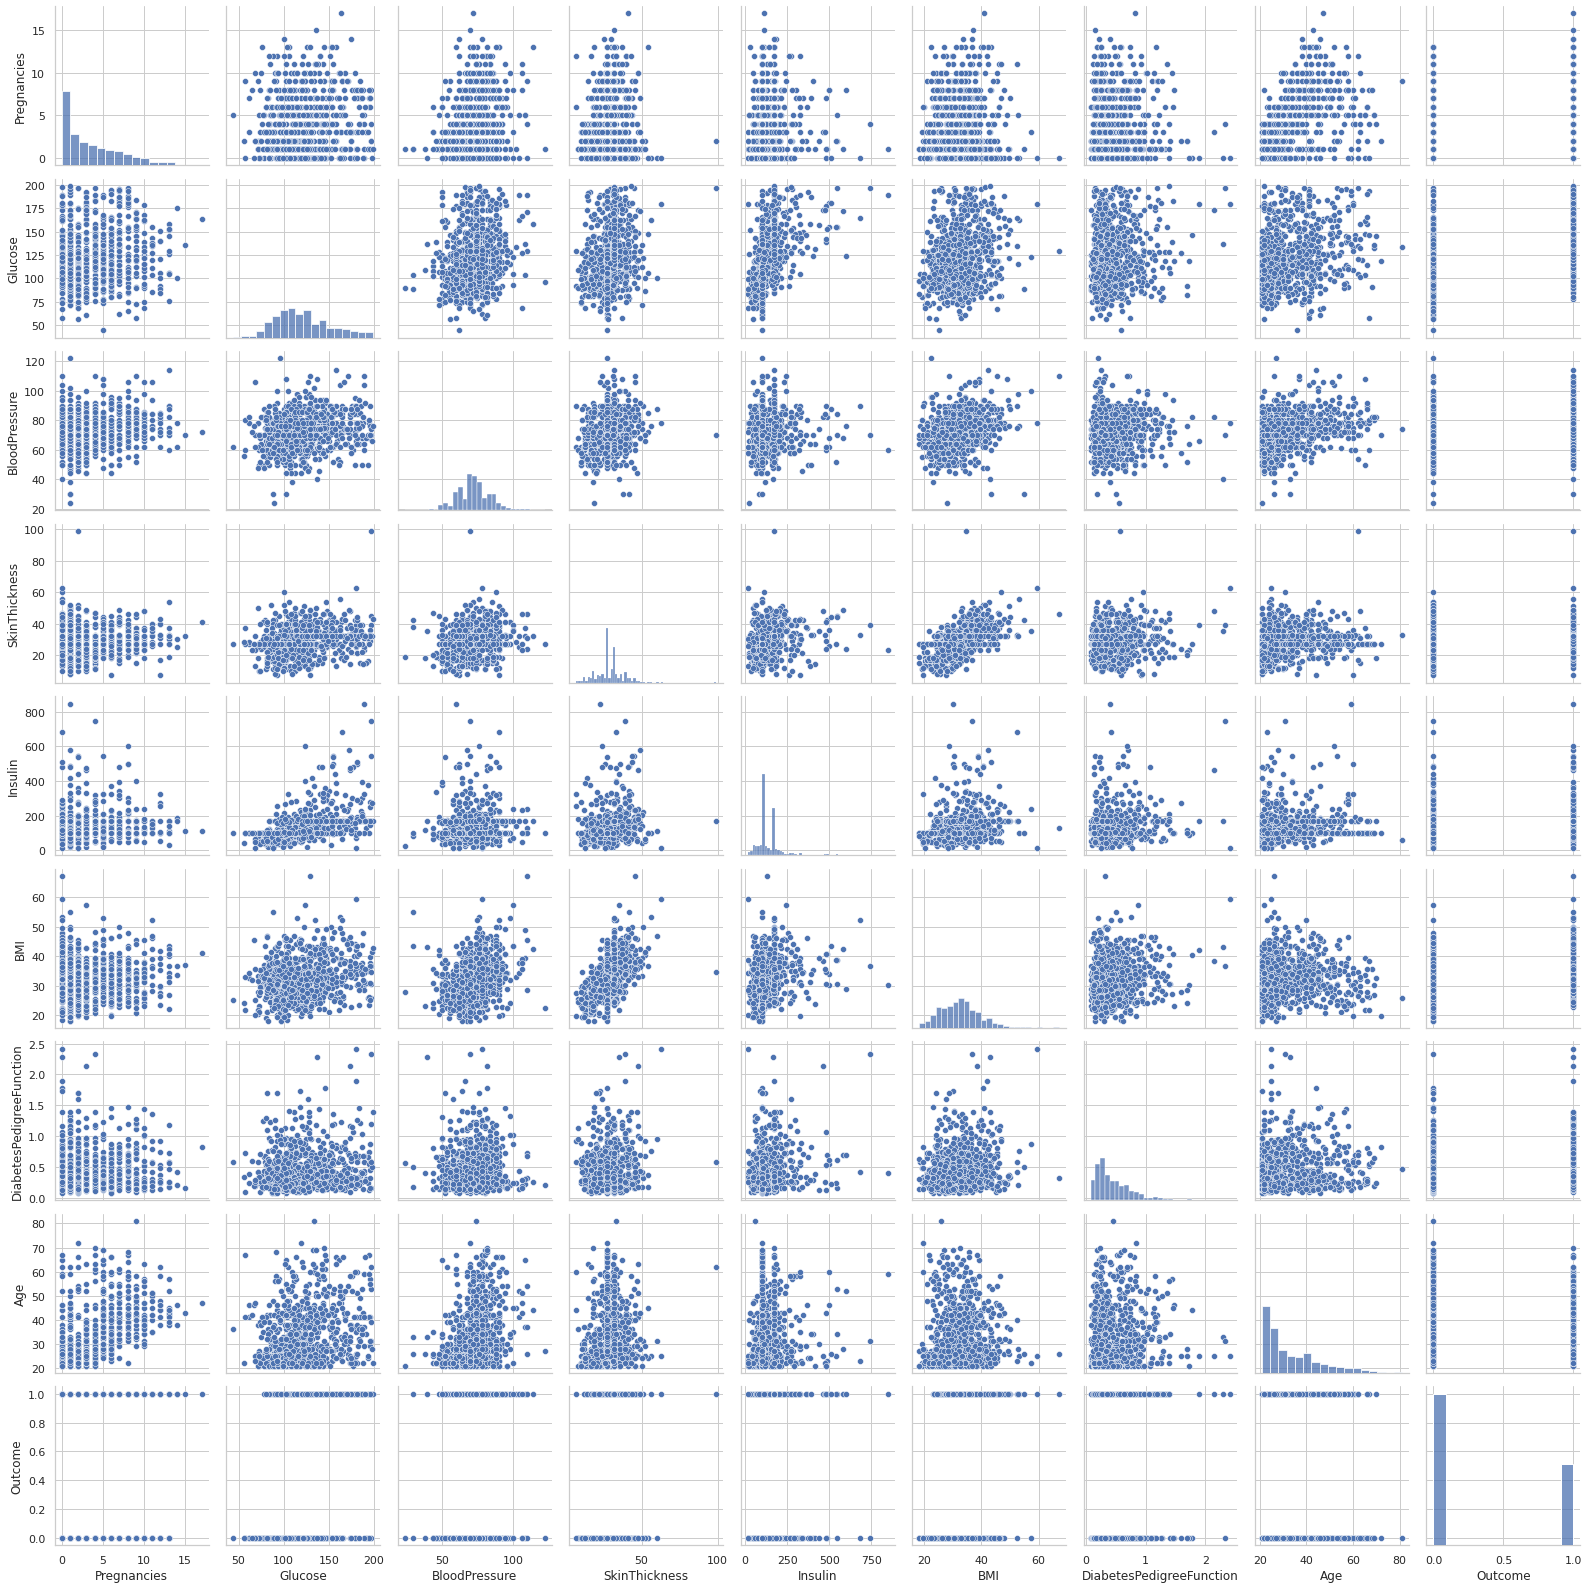

In [130]:
# Pairplot 
sns.pairplot(data = df)
plt.show()

OBSERVATION: We can observe the variations in each plot. The plots are in matrix format where the row name represents x axis and column name represents the y axis. The main-diagonal subplots are the univariate histograms (distributions) for each attribute.

Hue helps us to get the difference in variable in data to map plot aspects to different colours.

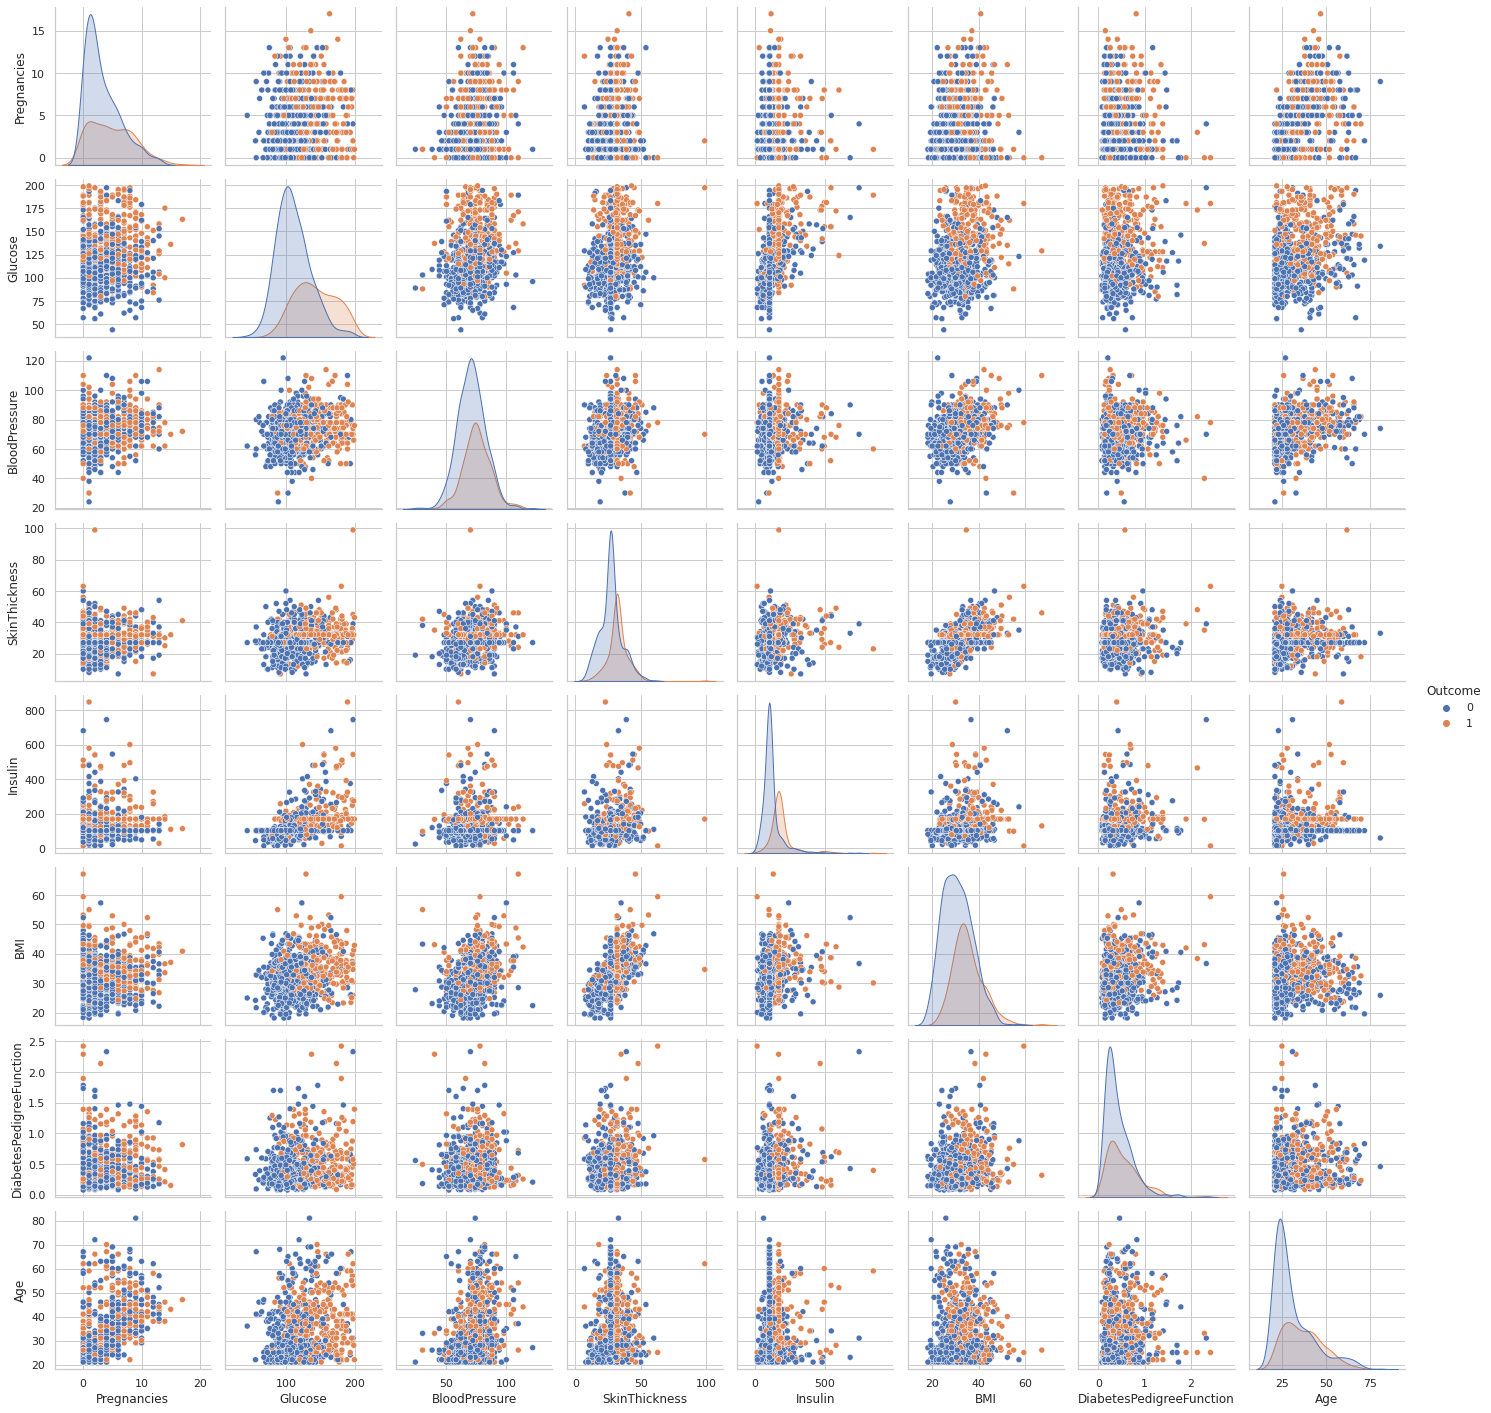

In [131]:
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

OBSERVATION: From the above pairplots, we could observe that there is a positive correlation between various features:


* Glucose level increases with Age.
* Insulin level increases with Glucose level.
* Insulin level increases with Age.
* Slight increase in BloodPressure with Age.
* Slight increase in BloodPressure with Insulin.
* Skin thickness increases with insulin.
* Skin thickness increases with BMI.











**FEATURE ENGINEERING:**
Process of extracting useful features from a raw dataset using mathematics, statistics and domain knowledge. Algorithms require features with some specific characteristic to work properly. Feature engineering mainly have two goals:
•	Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
•	Improving the performance of machine learning models.
It allows avoiding overfitting the model despite providing many input features. The ultimate goal is to get the best results from the algorithms.
DATA STRUCTURE USED: Numpy Pandas

OUTLIER OBSERVATION ANALYSIS: Outliers are datapoints that are far from other data points or unusual values in the dataset. These show some abnormality and deviate significantly from the normal data.

Tool used for finding the outliers: BOXPLOTS- Tool for exploratory data analysis and easily make comparisons between distributions.


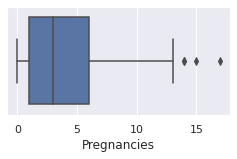

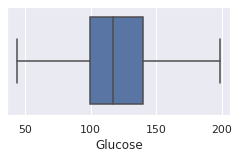

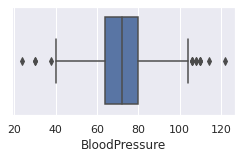

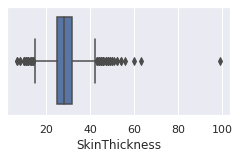

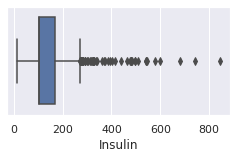

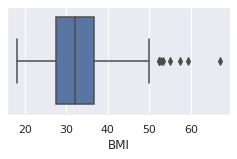

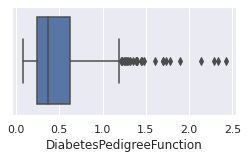

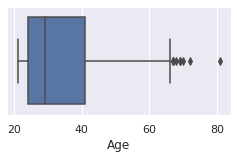

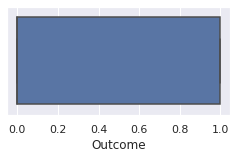

In [132]:
#box plot for outlier visualization
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Pregnancies'])
plt.show()
sns.boxplot(x=df['Glucose'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['SkinThickness'])
plt.show()
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BMI'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=df['Age'])
plt.show()
sns.boxplot(x=df['Outcome'])
plt.show()

Outliers are plotted as individual points.
We could observe that there is no outliers for Glucose and Outcome features and there are outliers for all other features.

Z SCORE METHOD:
Z score, also called standard score is another method that can be used to remove outliers.. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.
Z score = (x -mean) / std. deviation.
If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. Z-score function defined in scipy library to detect the outliers.
Libraries used- numpy


In [133]:
z = np.abs(stats.zscore(df))
print(z)

[[0.63994726 0.86462486 0.03218035 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.20472661 0.52812374 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 2.01426457 0.69343821 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.02224005 0.03218035 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.14199419 1.02406713 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.94195182 0.19749482 ... 0.47378505 0.87137393 0.73212021]]


Looking the code and the output above, it is difficult to say which data point is an outlier. so, we need to define a threshold to identify an outlier.

In [134]:
threshold = 3
print(np.where(z > 3 ))

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 286,
       298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445, 453,
       455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666, 673,
       684, 691, 695, 753]), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2, 3,
       4, 6, 2, 6, 4, 4, 7, 5, 7, 2, 4, 4]))


The first array contains the list of row numbers and second array respective column numbers, which mean z[4][6] have a Z-score higher than 3.

In [135]:
print(z[4][6])

5.484909100466951


 So, the data point 4th record on column 6 is an outlier as its values is greater than 3.

In [136]:
df = df [(z < 3).all(axis = 1)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


OBSERVATION:

All the outliers are removed, for example, 4th record is deleted as it had outlier and thus we got the clean data.


In [137]:
df.shape

(719, 9)

OBSERVATION: After the removal of the outliers, the dataset has decreased by 49 records.

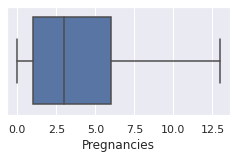

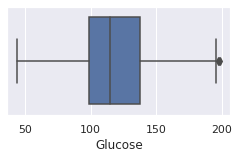

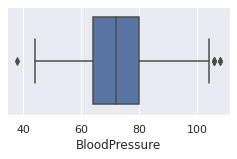

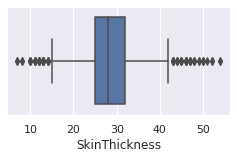

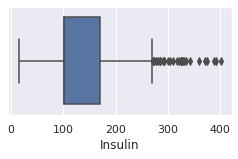

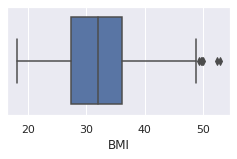

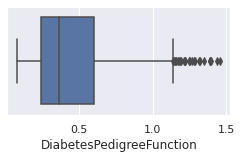

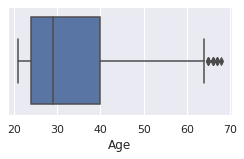

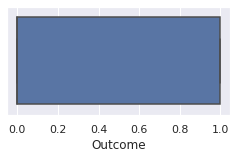

In [138]:
#BOXPLOT after removing the outliers using Z score method
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Pregnancies'])
plt.show()
sns.boxplot(x=df['Glucose'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['SkinThickness'])
plt.show()
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BMI'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=df['Age'])
plt.show()
sns.boxplot(x=df['Outcome'])
plt.show()

Two methods – IQR method and Z SCORE method are implemented to detect and remove the outliers from the dataset. The former method decreases the dataset to 590 records, whereas the later method decreases to719 records. Thus, Z score method deletes only 49 records from the dataset. On the other hand, Box Plots shows better results for IQR method than the Z score method. So, the method for the analysis of outliers will be selected according to accuracy level.

Feature Engineering:
Creating new variables is important for models. But we need to create a logical new variable. For this data set, some new variables are created according to BMI, Insulin and glucose variables. Max and Min values of each variable are found and some ranges are determined and categorical variables are assigned to BMI, Insulin and glucose variables. These categorical variables helps in easy understanding of the dataset.

In [139]:
print("Max : Pregnancies " + str(df["Pregnancies"].max()) + " Min Pregnancies: " + str(df["Pregnancies"].min()))

Max : Pregnancies 13 Min Pregnancies: 0


In [140]:
print("Max Glucose: " + str(df["Glucose"].max()) + " Min Glucose: " + str(df["Glucose"].min()))

Max Glucose: 199.0 Min Glucose: 44.0


In [141]:
print("Max BloodPressure: " + str(df["BloodPressure"].max()) + " Min BloodPressure: " + str(df["BloodPressure"].min()))

Max BloodPressure: 108.0 Min BloodPressure: 38.0


In [142]:
print("Max SkinThickness: " + str(df["SkinThickness"].max()) + " Min SkinThickness: " + str(df["SkinThickness"].min()))

Max SkinThickness: 54.0 Min SkinThickness: 7.0


In [143]:
print("Max Insulin: " + str(df["Insulin"].max()) + " Min Insulin: " + str(df["Insulin"].min()))

Max Insulin: 402.0 Min Insulin: 15.0


In [144]:
print("Max BMI: " + str(df["BMI"].max()) + " Min BMI: " + str(df["BMI"].min()))

Max BMI: 52.9 Min BMI: 18.2


In [145]:
print("Max DiabetesPedigreeFunction: " + str(df["DiabetesPedigreeFunction"].max()) + " Min DiabetesPedigreeFunction: " + str(df["DiabetesPedigreeFunction"].min()))

Max DiabetesPedigreeFunction: 1.4609999999999999 Min DiabetesPedigreeFunction: 0.078


In [146]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 68 Min Age: 21


Library used: Pandas

In [147]:
# According to BMI, some ranges are determined and categorical variables are assigned.
NewBMI = pd.Series(["Underweight", "Healthy", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight


OBSERVATION: According to BMI, 6 different ranges -Underweight, Healthy, Overweight, Obesity 1, Obesity 2, Obesity 3 are determined and categorical variable NewBMI is assigned. This categorical variable is ordinal- Ordinal categorical attributes have some sense or notion of order amongst its values.

In [148]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal


OBSERVATION: A categorical variable creation process is performed according to the insulin value. NewInsulinScore has 2 range- Normal and Abnormal and it is an ordinal categorical variable.

In [149]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Prediabetes", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Prediabetes


OBSERVATION: Some intervals- Low, Normal, Prediabetes, High were determined according to the glucose variable and these were assigned  an ordinal categorical variable, NewGlucose.

In [150]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Prediabetes
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,Obesity 1,Normal,Normal
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,Obesity 2,Normal,Prediabetes
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1,Obesity 1,Abnormal,Prediabetes
10,4,110.0,92.0,27.0,102.5,37.6,0.191,30,0,Obesity 2,Normal,Prediabetes
11,10,168.0,74.0,32.0,169.5,38.0,0.537,34,1,Obesity 2,Abnormal,High


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               719 non-null    int64   
 1   Glucose                   719 non-null    float64 
 2   BloodPressure             719 non-null    float64 
 3   SkinThickness             719 non-null    float64 
 4   Insulin                   719 non-null    float64 
 5   BMI                       719 non-null    float64 
 6   DiabetesPedigreeFunction  719 non-null    float64 
 7   Age                       719 non-null    int64   
 8   Outcome                   719 non-null    int64   
 9   NewBMI                    719 non-null    category
 10  NewInsulinScore           719 non-null    object  
 11  NewGlucose                719 non-null    category
dtypes: category(2), float64(6), int64(3), object(1)
memory usage: 63.6+ KB


We can now observe three categorical variables that are created. Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with 2 methos: Label Encoding and One Hot Encoding method.


In [153]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

**Label Encoding:** Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Here, each category is assigned a value from 1 to n, where n is the number of labels for the categorical feature.

In [154]:
df['BMI_Lable'] = Le.fit_transform(df['NewBMI'])

In [155]:
df['BMI_Lable']

0      1
1      4
2      0
3      4
5      4
      ..
763    1
764    2
765    4
766    1
767    1
Name: BMI_Lable, Length: 719, dtype: int64

In [156]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,BMI_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,4
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,4
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Prediabetes,4


OBSERVATION:
The categorical variable NewBMI is encoded by label encoding method. The new numeric BMI_Label feature has been encoded with:
0 for Healthy,
1 for Obesity_1,
2 for Obesity_2,
3 for Obesity_3,
4 for Overweight and
5 for Underweight.


In [157]:
df['Insulin_Lable'] = Le.fit_transform(df['NewInsulinScore'])

In [158]:
df['Insulin_Lable']

0      0
1      1
2      0
3      1
5      1
      ..
763    0
764    1
765    1
766    0
767    1
Name: Insulin_Lable, Length: 719, dtype: int64

In [159]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,BMI_Lable,Insulin_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High,1,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,4,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,4,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Prediabetes,4,1


OBSERVATION:

We can observe that the categorical variable NewInsulinScore is encoded by label encoding method. The new numeric Insulin_Label feature has been encoded with:
0 for Abnormal, and
1 for Normal.


In [160]:
df['Glucose_Lable'] = Le.fit_transform(df['NewGlucose'])

In [161]:
df['Glucose_Lable']

0      0
1      2
2      0
3      2
5      3
      ..
763    3
764    3
765    3
766    3
767    2
Name: Glucose_Lable, Length: 719, dtype: int64

In [162]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,BMI_Lable,Insulin_Lable,Glucose_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,4,1,2
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,4,1,2
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Prediabetes,4,1,3


OBSERVATION: The categorical variable NewGlucose is encoded by label encoding method. The new numeric Glucose_Label feature has been encoded with: 0 for High, 1 for Low, 2 for Normal, and 3 for Prediabetes.

In [163]:
df.shape

(719, 15)

Now, we can drop the categorical variables.

In [164]:
df = df.drop(["NewBMI",	"NewInsulinScore",	"NewGlucose"],axis=1)

In [165]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Lable,Insulin_Lable,Glucose_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,4,1,2
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,4,1,2
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,4,1,3


In [166]:
df.shape

(719, 12)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               719 non-null    int64  
 1   Glucose                   719 non-null    float64
 2   BloodPressure             719 non-null    float64
 3   SkinThickness             719 non-null    float64
 4   Insulin                   719 non-null    float64
 5   BMI                       719 non-null    float64
 6   DiabetesPedigreeFunction  719 non-null    float64
 7   Age                       719 non-null    int64  
 8   Outcome                   719 non-null    int64  
 9   BMI_Lable                 719 non-null    int64  
 10  Insulin_Lable             719 non-null    int64  
 11  Glucose_Lable             719 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 73.0 KB


### **SPLITTING THE DATASET**

In [169]:
Features_Columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','BMI_Lable','Insulin_Lable','Glucose_Lable']
X = df[Features_Columns]  # INDEPENDENT VARIABLES
y = df["Outcome"]         # DEPENDENT VARIABLE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)



### **HANDLING IMBALANCED DATASET**

In [170]:
y.value_counts()

0    477
1    242
Name: Outcome, dtype: int64

In [171]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

In [172]:
y.value_counts()

1    477
0    477
Name: Outcome, dtype: int64

### **LOGISTIC REGRESSION**

In [173]:
Logmodel = LogisticRegression()
Logmodel.fit(X_train, y_train)
y_prediction = Logmodel.predict(X_test)



accuracy1_LR = Logmodel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_LR * 100, "%")
accuracy2_LR = Logmodel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_LR * 100, "%")

Accuracy of train data =  83.50824587706147 %
Accuracy of test data =  85.71428571428571 %


In [174]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_grid_LR = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}
grid_LR = GridSearchCV(LogisticRegression(),param_grid_LR, scoring='accuracy', n_jobs=-1, cv=5).fit(X_train,y_train)
print('Best Score: %s' % grid_LR.best_score_)
print('Best Hyperparameters: %s' % grid_LR.best_params_)



Best Score: 0.8395690719335652
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [175]:
Tuned_LR_model = LogisticRegression(**grid_LR.best_params_).fit(X_train, y_train)
Tuned_LR_y_prediction = Tuned_LR_model.predict(X_test)


HP_accuracy1_LR = Tuned_LR_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_LR * 100, "%")
HP_accuracy2_LR = Tuned_LR_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_LR * 100, "%")


Accuracy of train data =  83.65817091454272 %
Accuracy of test data =  85.71428571428571 %


Text(0.5, -5.5, 'Predicted label')

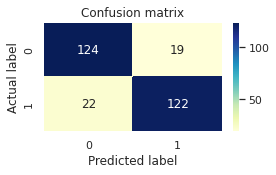

In [176]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_LR_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [177]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Tuned_LR_y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       143
           1       0.87      0.85      0.86       144

    accuracy                           0.86       287
   macro avg       0.86      0.86      0.86       287
weighted avg       0.86      0.86      0.86       287



### **SVM**

In [178]:

SvcModel = SVC()
#SvcModel = SVC(kernel = 'linear', random_state = 42)
SvcModel.fit(X_train, y_train)
y_prediction_SVM = SvcModel.predict(X_test)

accuracy1_SVM = SvcModel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_SVM * 100, "%")
accuracy2_SVM = SvcModel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_SVM * 100, "%")

#from sklearn.metrics import classification_report, confusion_matrix
#print(classification_report(y_test, y_prediction_SVM))

Accuracy of train data =  84.70764617691154 %
Accuracy of test data =  85.71428571428571 %


In [179]:
param_grid_SVM = {'C': [0.01,0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}
grid_SVM = GridSearchCV(SVC(), param_grid_SVM, refit = True,return_train_score=True, n_jobs=-1,cv=5).fit(X_train, y_train)

# print best parameter after tuning
print('Best Score: %s' % grid_SVM.best_score_)
print("BEST PARAMETER:",grid_SVM.best_params_) 
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)


Best Score: 0.8890472449781169
BEST PARAMETER: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [180]:
Tuned_SVM_model = SVC(**grid_SVM.best_params_).fit(X_train, y_train)
Tuned_SVM_y_prediction= Tuned_SVM_model.predict(X_test)

HP_accuracy1_SVM = Tuned_SVM_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_SVM * 100, "%")
HP_accuracy2_SVM = Tuned_SVM_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_SVM * 100, "%")
#print ("Accuracy : ", accuracy_score(y_test, Tuned_SVM_y_prediction)*100,"%")

#from sklearn.metrics import classification_report, confusion_matrix
#print(classification_report(y_test, HP_y_prediction_SVC))

Accuracy of train data =  100.0 %
Accuracy of test data =  89.89547038327527 %


Text(0.5, -5.5, 'Predicted label')

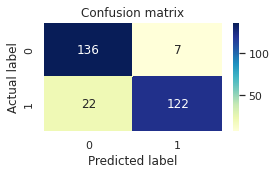

In [181]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_SVM_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Tuned_SVM_y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       143
           1       0.95      0.85      0.89       144

    accuracy                           0.90       287
   macro avg       0.90      0.90      0.90       287
weighted avg       0.90      0.90      0.90       287



### **DECISION TREE**

In [183]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train , y_train)
y_pred_decision_tree = decision_tree.predict(X_test)


accuracy1_DT = decision_tree.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_DT * 100, "%")
accuracy2_DT = decision_tree.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_DT * 100, "%")

Accuracy of train data =  100.0 %
Accuracy of test data =  88.85017421602788 %


In [184]:
param_grid_DT = {'criterion': ["gini", "entropy"], 
              'splitter': ["best", "random"], 
              'max_depth': [1, 2, 3], 
              'min_samples_split': [2, 3, 4]}
grid_DT = GridSearchCV(DecisionTreeClassifier(), param_grid_DT, cv=5, n_jobs=-1,scoring = 'accuracy' ).fit(X_train,y_train)


print ("Best score is:",grid_DT.best_score_) 
print ("BEST PARAMETERS:",grid_DT.best_params_)


#best_model = grid_DecisionTree.best_estimator_
#y_pred = best_model.predict(X_test)
#The accuracy of the test set:
#print ("The test set accuracy is:",accuracy_score(y_test, y_pred))

Best score is: 0.8665245202558636
BEST PARAMETERS: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3, 'splitter': 'best'}


In [185]:
Tuned_DT_model = DecisionTreeClassifier(**grid_DT.best_params_).fit(X_train,y_train)
Tuned_DT_y_prediction= Tuned_DT_model.predict(X_test)

HP_accuracy1_DT = Tuned_DT_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_DT * 100, "%")
HP_accuracy2_DT = Tuned_DT_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_DT * 100, "%")


Accuracy of train data =  88.75562218890555 %
Accuracy of test data =  89.19860627177701 %


Text(0.5, -5.5, 'Predicted label')

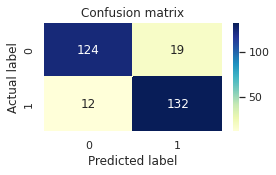

In [186]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_DT_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [187]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,Tuned_DT_y_prediction))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       143
           1       0.87      0.92      0.89       144

    accuracy                           0.89       287
   macro avg       0.89      0.89      0.89       287
weighted avg       0.89      0.89      0.89       287



### **NAIVE BAYES**

In [188]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train , y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)

accuracy1_NB = naive_bayes.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_NB * 100, "%")
accuracy2_NB = naive_bayes.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_NB * 100, "%")

Accuracy of train data =  84.8575712143928 %
Accuracy of test data =  87.8048780487805 %


In [189]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_NB = GridSearchCV(GaussianNB(), param_grid=params_NB, cv=5, scoring='accuracy').fit(X_train,y_train)


print ("Best score is:",grid_NB.best_score_) 
print ("BEST PARAMETERS:",grid_NB.best_params_)

Best score is: 0.8620581304006285
BEST PARAMETERS: {'var_smoothing': 1.0}


In [190]:
Tuned_NB_model = GaussianNB(**grid_NB.best_params_).fit(X_train,y_train)
Tuned_NB_y_prediction= Tuned_NB_model.predict(X_test)
HP_accuracy1_NB = Tuned_NB_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_NB * 100, "%")
HP_accuracy2_NB = Tuned_NB_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_NB * 100, "%")

Accuracy of train data =  86.05697151424287 %
Accuracy of test data =  87.10801393728222 %


Text(0.5, -5.5, 'Predicted label')

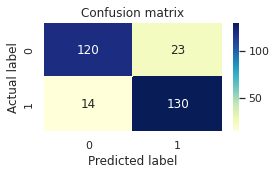

In [191]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_NB_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [192]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Tuned_NB_y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       143
           1       0.85      0.90      0.88       144

    accuracy                           0.87       287
   macro avg       0.87      0.87      0.87       287
weighted avg       0.87      0.87      0.87       287



### **RANDOM FOREST**

In [200]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train , y_train)
y_pred_Random_Forest = Random_Forest.predict(X_test)


accuracy1_RF = Random_Forest.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_RF * 100, "%")
accuracy2_RF = Random_Forest.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_RF * 100, "%")

Accuracy of train data =  100.0 %
Accuracy of test data =  90.94076655052264 %


In [194]:
param_grid_RF = {'bootstrap': [True],
    'max_depth': [80, 90, 100,110],
    'criterion' : ('gini','entropy'),
    'max_features': [2, 3],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [ 200, 300, 1000]}
grid_RF = GridSearchCV(RandomForestClassifier(), param_grid_RF, cv=5, n_jobs=-1,scoring = 'accuracy' ).fit(X_train,y_train)


print ("Best score is:",grid_RF.best_score_) 
print ("BEST PARAMETERS:",grid_RF.best_params_)


Best score is: 0.9025137470542026
BEST PARAMETERS: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 90, 'max_features': 2, 'n_estimators': 300}


In [196]:
Tuned_RF_model = RandomForestClassifier(**grid_RF.best_params_).fit(X_train,y_train)
Tuned_RF_y_prediction= Tuned_RF_model.predict(X_test)

HP_accuracy1_RF = Tuned_RF_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_RF * 100, "%")
HP_accuracy2_RF = Tuned_RF_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_RF * 100, "%")

#print ("Accuracy : ", accuracy_score(y_test, Tuned_RF_y_prediction)*100,"%")

Accuracy of train data =  100.0 %
Accuracy of test data =  91.28919860627178 %


Text(0.5, -5.5, 'Predicted label')

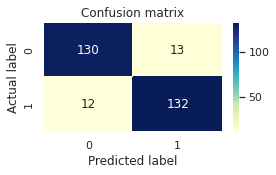

In [201]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_RF_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [202]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,Tuned_RF_y_prediction))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       143
           1       0.91      0.92      0.91       144

    accuracy                           0.91       287
   macro avg       0.91      0.91      0.91       287
weighted avg       0.91      0.91      0.91       287



### **KNN**

In [203]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train , y_train)
y_pred_KNN=KNN_model.predict(X_test)

accuracy1_KNN = KNN_model.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_KNN * 100, "%")
accuracy2_KNN = KNN_model.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_KNN * 100, "%")

Accuracy of train data =  91.45427286356822 %
Accuracy of test data =  89.54703832752612 %


In [204]:
k_range = list(range(1, 31))
param_grid_KNN = dict(n_neighbors=k_range)

grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, cv=5, n_jobs=-1,scoring = 'accuracy' ).fit(X_train,y_train)


print ("Best score is:",grid_KNN.best_score_) 
print ("BEST PARAMETERS:",grid_KNN.best_params_)


Best score is: 0.8905510043766132
BEST PARAMETERS: {'n_neighbors': 1}


In [205]:
Tuned_KNN_model = KNeighborsClassifier(**grid_KNN.best_params_).fit(X_train,y_train)
Tuned_KNN_y_prediction= Tuned_KNN_model.predict(X_test)

HP_accuracy1_KNN = Tuned_KNN_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_KNN * 100, "%")
HP_accuracy2_KNN = Tuned_KNN_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_KNN * 100, "%")


Accuracy of train data =  100.0 %
Accuracy of test data =  90.59233449477352 %


Text(0.5, -5.5, 'Predicted label')

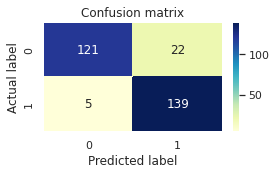

In [206]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_KNN_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [207]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,Tuned_KNN_y_prediction ))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       143
           1       0.86      0.97      0.91       144

    accuracy                           0.91       287
   macro avg       0.91      0.91      0.91       287
weighted avg       0.91      0.91      0.91       287



All categorical variables in the dataset are converted into numeric values by encoding.